<a href="https://colab.research.google.com/github/Cam-Mott/Soluciones_administrativas_con_NLP/blob/main/portfolio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [43]:
acceso = 'https://docs.google.com/spreadsheets/d/1cQTkPg2PA-HYuUK6xVV47RMlNxA5oLi_VGHDtGKsjmQ/'
planilla = pd.read_csv(f'{acceso}export?format=csv')
planilla.columns = (['fecha', 'concepto', 'categoría'])
planilla = planilla.dropna()
print('-----------------')
print(f'Valores nulos:\n {planilla.isnull().sum()}')
print('-----------------')
planilla

-----------------
Valores nulos:
 fecha        0
concepto     0
categoría    0
dtype: int64
-----------------


,fecha,concepto,categoría
1,02/01/2024,Sandra Limpieza,Gsts Varios SH
2,02/01/2024,Tere Cubre Francos,Serv. Comer. y Fin
4,02/01/2024,Bolsas,Gsts Varios SH
7,03/01/2024,Carlos Md,Logística
9,03/01/2024,Celeste CAJA,Serv. Comer. y Fin
...,...,...,...
953,31/10/2024,walter comisionista,Logística
954,31/10/2024,celeste caJA,Serv. Comer. y Fin
957,31/10/2024,Gastos deposito,Logística
958,31/10/2024,Tere CAJA,Serv. Comer. y Fin


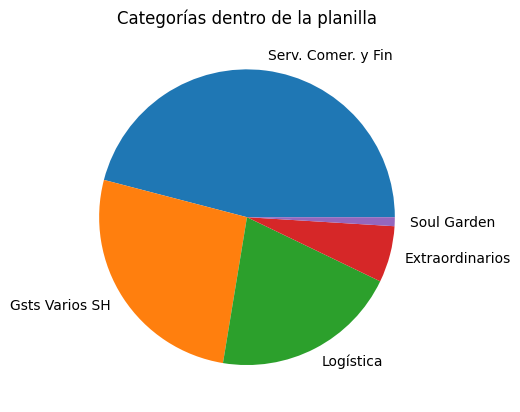

,count
categoría,
Serv. Comer. y Fin,283
Gsts Varios SH,163
Logística,126
Extraordinarios,38
Soul Garden,6


In [44]:
plt.pie(list(planilla.categoría.value_counts()),
        labels = planilla.categoría.value_counts().index)
plt.title('Categorías dentro de la planilla')
plt.show()

planilla.categoría.value_counts()

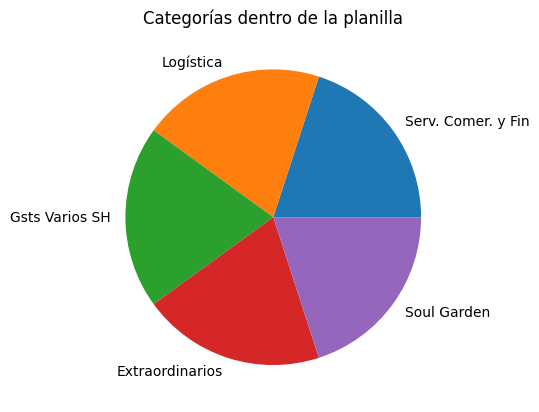

,count
categoría,
Serv. Comer. y Fin,126
Logística,126
Gsts Varios SH,126
Extraordinarios,126
Soul Garden,126


In [4]:
serv = planilla.loc[planilla.categoría == 'Serv. Comer. y Fin'].sample(n=126, random_state = 42, replace = True)
gastos = planilla.loc[planilla.categoría == 'Gsts Varios SH'].sample(n=126, random_state = 42, replace = True)
log = planilla.loc[planilla.categoría == 'Logística'].sample(n=126, random_state = 42, replace = True)
extra = planilla.loc[planilla.categoría == 'Extraordinarios'].sample(n=126, random_state = 42, replace = True)
sg = planilla.loc[planilla.categoría == 'Soul Garden'].sample(n=126, random_state = 42, replace = True)

planilla = pd.concat([serv, gastos, log, extra, sg], axis = 0).sort_values(by = 'fecha').reset_index(drop = True)

plt.pie(list(planilla.categoría.value_counts()),
        labels = planilla.categoría.value_counts().index)
plt.title('Categorías dentro de la planilla')
plt.show()

planilla.categoría.value_counts()

In [5]:
signos = list(string.punctuation)
reemplazos = ['']*len(signos)
diccionario_reemplazos = {signo:reemplazo for (signo, reemplazo) in zip(signos, reemplazos)}

codificación = str.maketrans(diccionario_reemplazos)
nuevos_conceptos = [texto.translate(codificación) for texto in planilla.concepto]
planilla.concepto = nuevos_conceptos
planilla

,fecha,concepto,categoría,egreso
0,01/02/2024,Financiera Nahuel Dolares Pago diferencia de D...,Serv. Comer. y Fin,"$102,397.00"
1,01/03/2024,Streecht Deposito,Logística,"$29,900.00"
2,01/03/2024,Sandrita Limpieza,Gsts Varios SH,"$14,000.00"
3,01/03/2024,Farmacia,Gsts Varios SH,"$4,500.00"
4,01/06/2024,EUGE CAJA,Serv. Comer. y Fin,"$250,000.00"
...,...,...,...,...
625,31/10/2024,Pago proveedores soulgarden,Soul Garden,"$150,000.00"
626,31/10/2024,Pago proveedores soulgarden,Soul Garden,"$150,000.00"
627,31/10/2024,Pago proveedores soulgarden,Soul Garden,"$150,000.00"
628,31/10/2024,walter comisionista,Logística,"$40,000.00"


In [6]:
vectorizador_bow = CountVectorizer()
vectorizador_tf = TfidfVectorizer()
X_bow, X_tf = vectorizador_bow.fit_transform(planilla.concepto), vectorizador_tf.fit_transform(planilla.concepto)
y = planilla.categoría

X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, random_state = 42, test_size = 0.3)
X_train_tf, X_test_tf, y_train, y_test = train_test_split(X_tf, y, random_state = 42, test_size = 0.3)

modelo_bow = RandomForestClassifier()
modelo_bow.fit(X_train_bow, y_train)

modelo_tf = RandomForestClassifier()
modelo_tf.fit(X_train_tf, y_train)

RandomForestClassifier()

In [34]:
predicción_bow = modelo_bow.predict(X_test_bow)
predicción_tf = modelo_tf.predict(X_test_tf)

from imblearn import metrics

print('\nMétricas Modelo BoW:')
print(classification_report(y_test, predicción_bow))
print(f'Specificity BoW: {metrics.specificity_score(y_test, predicción_bow, average = "weighted")}')
print('------------------------------------------------------------')
print('\nMétricas Modelo TF-IDF:')
print(classification_report(y_test, predicción_tf))
print(f'Specificity TF-IDF: {metrics.specificity_score(y_test, predicción_tf, average = "weighted")}')


Métricas Modelo BoW:
                    precision    recall  f1-score   support

   Extraordinarios       1.00      1.00      1.00        26
    Gsts Varios SH       0.94      1.00      0.97        45
         Logística       1.00      0.95      0.98        42
Serv. Comer. y Fin       1.00      0.97      0.99        36
       Soul Garden       1.00      1.00      1.00        40

          accuracy                           0.98       189
         macro avg       0.99      0.98      0.99       189
      weighted avg       0.99      0.98      0.98       189

Specificity BoW: 0.9950396825396826
------------------------------------------------------------

Métricas Modelo TF-IDF:
                    precision    recall  f1-score   support

   Extraordinarios       1.00      1.00      1.00        26
    Gsts Varios SH       0.94      1.00      0.97        45
         Logística       1.00      0.93      0.96        42
Serv. Comer. y Fin       0.97      0.97      0.97        36
       Soul 

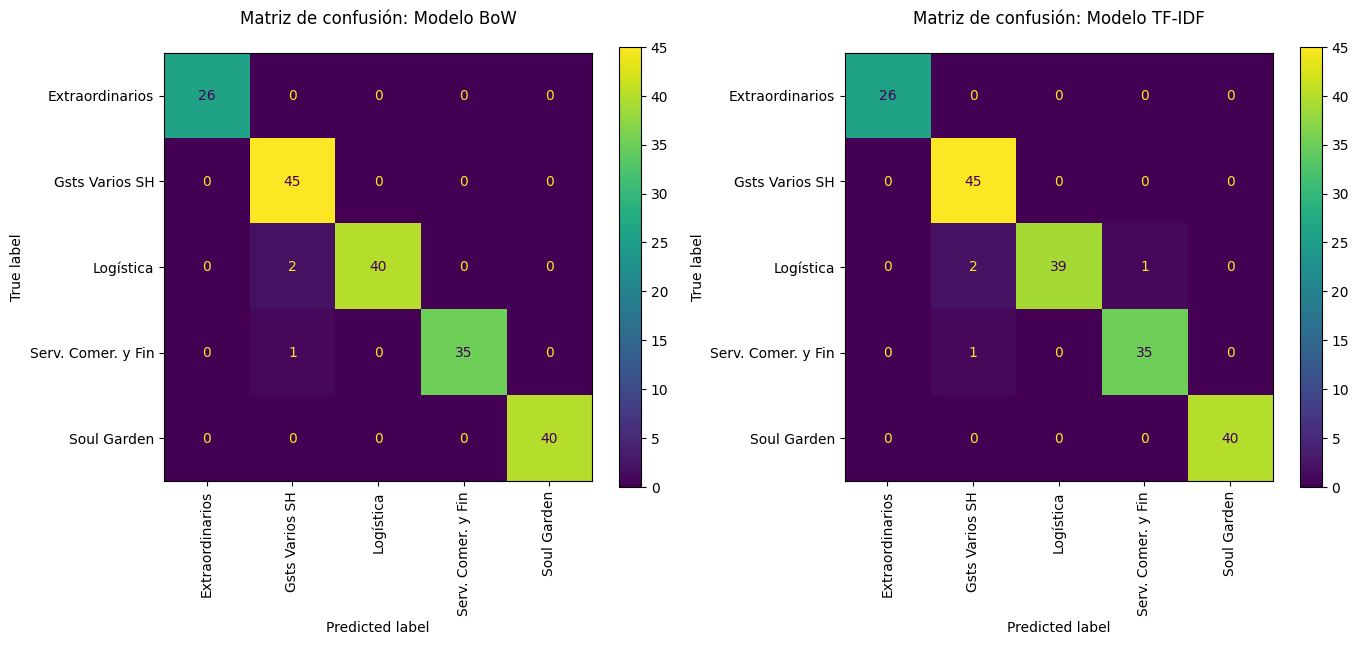

In [8]:
matriz_confusión_bow = metrics.confusion_matrix(y_test, predicción_bow)
gráfica_matriz_bow = metrics.ConfusionMatrixDisplay(matriz_confusión_bow, display_labels = modelo_bow.classes_)

matriz_confusión_tf = metrics.confusion_matrix(y_test, predicción_tf)
gráfica_matriz_tf = metrics.ConfusionMatrixDisplay(matriz_confusión_tf, display_labels = modelo_tf.classes_)

fig, ax = plt.subplots(1, 2, figsize = (14,6))

gráfica_matriz_bow.plot(ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[0].set_title('Matriz de confusión: Modelo BoW\n')

gráfica_matriz_tf.plot(ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].set_title('Matriz de confusión: Modelo TF-IDF\n')

plt.tight_layout()
plt.show()

In [9]:
#Prueba del modelo

def prueba_modelo(texto, modelo_bow, modelo_tf, vectorizador_bow, vectorizador_tf):
  texto_bow = vectorizador_bow.transform([texto])
  texto_tf = vectorizador_tf.transform([texto])
  predicho_bow = modelo_bow.predict(texto_bow)
  predicho_tf = modelo_tf.predict(texto_tf)
  print(f'El Modelo BoW determino la categoría {predicho_bow}')
  print(f'El Modelo TF-IDF determino la categoría {predicho_tf}')

print('---------------------------------------------------')
texto = input('Ingrese concepto:')
print('---------------------------------------------------')

prueba_modelo(texto, modelo_bow, modelo_tf, vectorizador_bow, vectorizador_tf)

---------------------------------------------------
Ingrese concepto:compra de foquitos de luz
---------------------------------------------------
El Modelo BoW determino la categoría ['Extraordinarios']
El Modelo TF-IDF determino la categoría ['Gsts Varios SH']


In [10]:
#¿Que se hizo diferente esta vez?

#1-Se elimino la categoría "Varios" (muy ambigua)
#2-Se eliminaron los signos de puntuación.
#3-Se balancearon las clases.